In [1]:
import numpy as np
import torch
import torchvision
import detectron2
import cv2
import os
import json
import random

In [2]:
print(torch.__version__, torch.cuda.is_available())

1.9.0 True


In [3]:
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [4]:
from detectron2.data.datasets import register_coco_instances
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [5]:
register_coco_instances("heading",{},"VOC2COCO/output.json","21S1_URECA_FYP/早报2020-01")
register_coco_instances("heading_test",{},"21S1_URECA_FYP/test/VOC2COCO/output.json","21S1_URECA_FYP/test")

In [6]:
heading_metadata = MetadataCatalog.get('heading')

In [7]:
heading_metadata

namespace(name='heading',
          json_file='VOC2COCO/output.json',
          image_root='21S1_URECA_FYP/早报2020-01',
          evaluator_type='coco')

In [8]:
heading_dataset_dicts = DatasetCatalog.get('heading')

[10/08 17:46:45 d2.data.datasets.coco]: Loaded 69 images in COCO format from VOC2COCO/output.json


In [9]:
len(heading_dataset_dicts)

69

In [10]:
heading_dataset_dicts[0].keys()

dict_keys(['file_name', 'height', 'width', 'image_id', 'annotations'])

In [11]:
import matplotlib.pyplot as plt

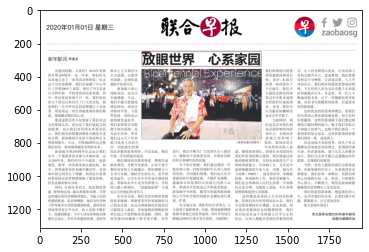

In [12]:
d = random.sample(heading_dataset_dicts, 1)[0]
img = cv2.imread(d["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=heading_metadata, scale=1)
vis = visualizer.draw_dataset_dict(d)
plt.imshow(vis.get_image())

In [13]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
config_name = "COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"
cfg.merge_from_file(model_zoo.get_config_file(config_name))
cfg.DATASETS.TRAIN = ("heading",)
cfg.DATASETS.TEST = ("heading_test",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml") 
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  
cfg.SOLVER.MAX_ITER = 500    
cfg.SOLVER.STEPS = []        
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

[10/08 17:46:48 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[10/08 17:46:48 d2.data.datasets.coco]: Loaded 69 images in COCO format from VOC2COCO/output.json
[10/08 17:46:48 d2.data.build]: Removed 0 images with no usable annotations. 69 images left.
[10/08 17:46:48 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|  heading   | 69           |
|            |              |
[10/08 17:46:48 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[10/08 17:46:48 d2.data.build]: Using training sampler TrainingSampler
[10/08 17:46:48 d2.data.common]: Serializing 69 elements to byte tensors and concatenating them all ...
[10/08 17:46:48 d2.data.common]: Serialized dataset takes 0.02 MiB


Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, we

In [14]:
trainer.train()

[10/08 17:46:48 d2.engine.train_loop]: Starting training from iteration 0


/home/shared/anaconda3/envs/newspaper/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/home/shared/anaconda3/envs/newspaper/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/c10/core/TensorImpl.h:1156.)
  r

[10/08 17:46:54 d2.utils.events]:  eta: 0:02:05  iter: 19  total_loss: 1.219  loss_cls: 0.5954  loss_box_reg: 0.0004599  loss_rpn_cls: 0.4542  loss_rpn_loc: 0.07955  time: 0.2652  data_time: 0.0097  lr: 9.7405e-06  max_mem: 2733M
[10/08 17:46:59 d2.utils.events]:  eta: 0:02:05  iter: 39  total_loss: 0.7968  loss_cls: 0.5073  loss_box_reg: 0.0177  loss_rpn_cls: 0.209  loss_rpn_loc: 0.05188  time: 0.2721  data_time: 0.0022  lr: 1.9731e-05  max_mem: 2733M
[10/08 17:47:04 d2.utils.events]:  eta: 0:01:58  iter: 59  total_loss: 0.6487  loss_cls: 0.3579  loss_box_reg: 0.06203  loss_rpn_cls: 0.07866  loss_rpn_loc: 0.0725  time: 0.2664  data_time: 0.0021  lr: 2.972e-05  max_mem: 2733M
[10/08 17:47:10 d2.utils.events]:  eta: 0:01:53  iter: 79  total_loss: 0.5209  loss_cls: 0.268  loss_box_reg: 0.09699  loss_rpn_cls: 0.05112  loss_rpn_loc: 0.03205  time: 0.2663  data_time: 0.0022  lr: 3.9711e-05  max_mem: 2733M
[10/08 17:47:15 d2.utils.events]:  eta: 0:01:47  iter: 99  total_loss: 0.4731  loss_cl

In [15]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth") 
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

[10/08 17:52:40 d2.data.datasets.coco]: Loaded 11 images in COCO format from 21S1_URECA_FYP/test/VOC2COCO/output.json


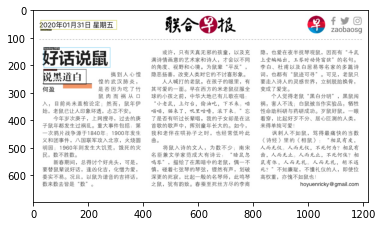

In [29]:
from detectron2.utils.visualizer import ColorMode
test_dicts = DatasetCatalog.get("heading_test")
for d in random.sample(test_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  
    v = Visualizer(im[:, :, ::-1],
                   metadata=heading_metadata, 
                   scale=1, 
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(out.get_image())
    out.save('test.png')